# Majority Frequency in the Roberts Court

Devin Barkey

May 4, 2021

Inspired by a graphic on [SCOTUSblog](https://www.scotusblog.com/) showing each justice's frequency in the majority, I decided to visualize that measure across all terms in the Roberts Court. I obtained the data from the [Supreme Court Database](http://supremecourtdatabase.org/index.php).

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read csv file into pandas DataFrame
path = "/Users/devinbarkey/Documents/Projects/The Roberts Court/SCDB_2020_01_justiceCentered_Docket.csv"
df = pd.read_csv(path, encoding = 'ISO-8859-1')

In [3]:
df.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [4]:
roberts_court = df[df['chief'] == "Roberts"]

In [5]:
roberts_court.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
82451,2005-001,2005-001-01,2005-001-01-01,2005-001-01-01-01-01,10/11/2005,2,546 U.S. 1,126 S. Ct. 5,163 L. Ed. 2d 1,2005 U.S. LEXIS 7649,...,9,0,103,JPStevens,1.0,1.0,2.0,2.0,NaN,NaN
82452,2005-001,2005-001-01,2005-001-01-01,2005-001-01-01-01-02,10/11/2005,2,546 U.S. 1,126 S. Ct. 5,163 L. Ed. 2d 1,2005 U.S. LEXIS 7649,...,9,0,104,SDOConnor,1.0,1.0,2.0,2.0,NaN,NaN
82453,2005-001,2005-001-01,2005-001-01-01,2005-001-01-01-01-03,10/11/2005,2,546 U.S. 1,126 S. Ct. 5,163 L. Ed. 2d 1,2005 U.S. LEXIS 7649,...,9,0,105,AScalia,1.0,1.0,2.0,2.0,NaN,NaN
82454,2005-001,2005-001-01,2005-001-01-01,2005-001-01-01-01-04,10/11/2005,2,546 U.S. 1,126 S. Ct. 5,163 L. Ed. 2d 1,2005 U.S. LEXIS 7649,...,9,0,106,AMKennedy,1.0,1.0,2.0,2.0,NaN,NaN
82455,2005-001,2005-001-01,2005-001-01-01,2005-001-01-01-01-05,10/11/2005,2,546 U.S. 1,126 S. Ct. 5,163 L. Ed. 2d 1,2005 U.S. LEXIS 7649,...,9,0,107,DHSouter,1.0,1.0,2.0,2.0,NaN,NaN


In [6]:
roberts_court.shape

(11516, 61)

In [7]:
roberts_court.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote',
       'opinion', 'direction', 'majority', 'firstA

In [8]:
roberts_court['justiceName'].unique()

array(['JPStevens', 'SDOConnor', 'AScalia', 'AMKennedy', 'DHSouter',
       'CThomas', 'RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito',
       'SSotomayor', 'EKagan', 'NMGorsuch', 'BMKavanaugh'], dtype=object)

In [9]:
roberts_court['justice'].unique()

array([103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116])

Below, I created a `pandas` `DataFrame` listing each justice, their justice number in the database, and their beginning and end terms. Note the following:
- I don't include Sandra Day O'Connor as she only served half a term in the Roberts Court (until Alito was confirmed).
- Begining term is first term in which they participated in all cases (outside of recusals).
- End term is last term in which justice participated in all cases (outside of recusals).

In [10]:
justices = pd.DataFrame({'justice_name': ['Roberts', 'Stevens', 'Scalia', 'Kennedy', 'Souter', 'Thomas', 'Ginsburg', 'Breyer', 'Alito', 'Sotomayor', 'Kagan', 'Gorsuch', 'Kavanaugh'],
                        'justice_number': [111, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116],
                        'beg_term': [2005, 1976, 1986, 1988, 1991, 1992, 1993, 1994, 2006, 2009, 2010, 2017, 2019],
                        'end_term': [2019, 2009, 2015, 2017, 2008, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019]})

In [11]:
justices

,justice_name,justice_number,beg_term,end_term
0,Roberts,111,2005,2019
1,Stevens,103,1976,2009
2,Scalia,105,1986,2015
3,Kennedy,106,1988,2017
4,Souter,107,1991,2008
5,Thomas,108,1992,2019
6,Ginsburg,109,1993,2019
7,Breyer,110,1994,2019
8,Alito,112,2006,2019
9,Sotomayor,113,2009,2019


In [12]:
# Create DataFrame with NaNs to fill in
maj_freq = pd.DataFrame({'term': list(range(2005, 2020)), 'Roberts': np.nan, 'Stevens': np.nan, 'Scalia': np.nan, 'Kennedy': np.nan, 'Souter': np.nan, 
                        'Thomas': np.nan, 'Ginsburg': np.nan, 'Breyer': np.nan, 'Alito': np.nan, 'Sotomayor': np.nan, 'Kagan': np.nan, 'Gorsuch': np.nan, 
                        'Kavanaugh': np.nan})

In [13]:
maj_freq = maj_freq.set_index('term')

In [14]:
maj_freq

,Roberts,Stevens,Scalia,Kennedy,Souter,Thomas,Ginsburg,Breyer,Alito,Sotomayor,Kagan,Gorsuch,Kavanaugh
term,,,,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def calc_maj_freq(j_number, start, end):
    """Function to calculate the percentage of cases in which a justice participated and was in the majority"""
    if start < 2005:
        start = 2005
    
    justice = df.loc[(df['term'] >= start) & (df['term'] <= end ) & (df['justice'] == j_number)]
    justice = justice.drop_duplicates(subset = 'caseId')
    justice_by_term = justice.groupby('term')['majority'].value_counts()
    justice_maj = np.array([justice_by_term.loc[year, 2.0] for year in range(start, end+1)])
    justice_dissent = np.array([justice_by_term.loc[year, 1.0] for year in range(start, end+1)])
    return justice_maj/(justice_maj + justice_dissent)
    

In [16]:
#loop to fill in the DataFrame for each justice
for name, num, beg, end in zip(justices['justice_name'], justices['justice_number'], justices['beg_term'], justices['end_term']):
    terms = (maj_freq.index >= beg) & (maj_freq.index <= end)
    maj_freq.loc[terms, name] = calc_maj_freq(num, beg, end)

In [17]:
maj_freq

,Roberts,Stevens,Scalia,Kennedy,Souter,Thomas,Ginsburg,Breyer,Alito,Sotomayor,Kagan,Gorsuch,Kavanaugh
term,,,,,,,,,,,,,
2005,0.926829,0.793103,0.896552,0.896552,0.839080,0.848837,0.850575,0.827586,NaN,NaN,NaN,NaN,NaN
2006,0.888889,0.640000,0.797297,0.972973,0.770270,0.770270,0.720000,0.753425,0.866667,NaN,NaN,NaN,NaN
2007,0.901408,0.736111,0.819444,0.861111,0.763889,0.763889,0.750000,0.764706,0.830986,NaN,NaN,NaN,NaN
2008,0.819277,0.650602,0.843373,0.927711,0.698795,0.819277,0.710843,0.746988,0.819277,NaN,NaN,NaN,NaN
2009,0.903226,0.725275,0.870968,0.903226,NaN,0.838710,0.795699,0.771739,0.879121,0.804598,NaN,NaN,NaN
2010,0.913580,NaN,0.878049,0.939024,NaN,0.878049,0.719512,0.768293,0.865854,0.797468,0.767857,NaN,NaN
2011,0.907895,NaN,0.805195,0.934211,NaN,0.844156,0.701299,0.766234,0.818182,0.802632,0.821918,NaN,NaN
2012,0.860759,NaN,0.784810,0.911392,NaN,0.797468,0.784810,0.820513,0.794872,0.782051,0.802632,NaN,NaN
2013,0.920000,NaN,0.893333,0.946667,NaN,0.866667,0.853333,0.864865,0.878378,0.810811,0.890411,NaN,NaN


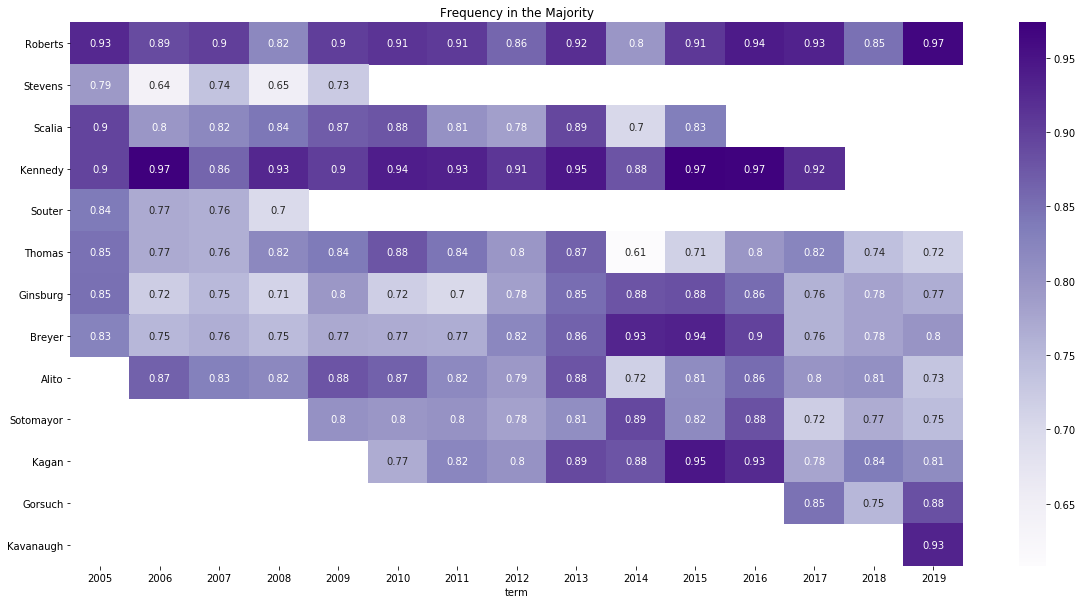

In [21]:
#Plot data as a heatmap
plt.figure(figsize=(20,10))
plt.title('Frequency in the Majority')
sns.heatmap(data = maj_freq.transpose(), annot = True, cmap = 'Purples')
plt.savefig('roberts_majority.png')